# Pre-Processing of Data
### Karthik Prakash (002728828)

## What is Pre-Processing of Data ?
#### -> Data preprocessing is a crucial step in the data analysis and machine learning pipeline. It involves cleaning, organizing, and transforming raw data into a format suitable for analysis or model training.
#### -> Proper data preprocessing can significantly impact the performance and reliability of the subsequent analysis or machine learning model.
#### -> Steps involved in data preprocessing:
#### -> 1) Data Cleaning:
#### Handling Missing Values: Identify and address missing data by either removing instances with missing values, imputing values using statistical methods, or leveraging advanced imputation techniques.
#### Outlier Detection and Treatment: Identify and handle outliers, which are data points significantly different from the rest. Outliers can distort analysis or negatively impact model performance.
#### -> 2) Data Integration:
#### Merge or combine data from different sources if needed. This ensures that the data is comprehensive and contains all relevant information for analysis or modeling.
#### -> 3) Data Transformation:
#### Standardization/Normalization: Scale numerical features to a standard range (e.g., mean of 0 and standard deviation of 1) to ensure that all features contribute equally to the analysis or model.
#### Feature Engineering: Create new features or transform existing features to extract more relevant information. This can enhance the model's ability to capture patterns in the data.
#### -> 4) Data Reduction:
#### Dimensionality Reduction: Reduce the number of features while retaining as much of the important information as possible. Techniques like Principal Component Analysis (PCA) can be used for this purpose.
#### -> 5) Data Splitting:
#### Divide the dataset into training and testing sets to evaluate the model's performance on unseen data. Common splits include 70-30, 80-20, or 90-10, depending on the size of the dataset.
#### -> 6) Handling Imbalanced Data:
#### Address class imbalance issues if present, especially in classification problems. Techniques include oversampling the minority class, undersampling the majority class, or using synthetic data generation methods.
#### -> 7) Text Preprocessing (for NLP):
#### Tokenization: Break down text into individual words or tokens.
#### Removing Stop Words: Exclude common words (e.g., "and," "the") that may not contribute meaningful information.
#### -> 8) Data Exploration and Visualization:
#### Explore and visualize the data to gain insights, identify patterns, and inform subsequent preprocessing decisions.

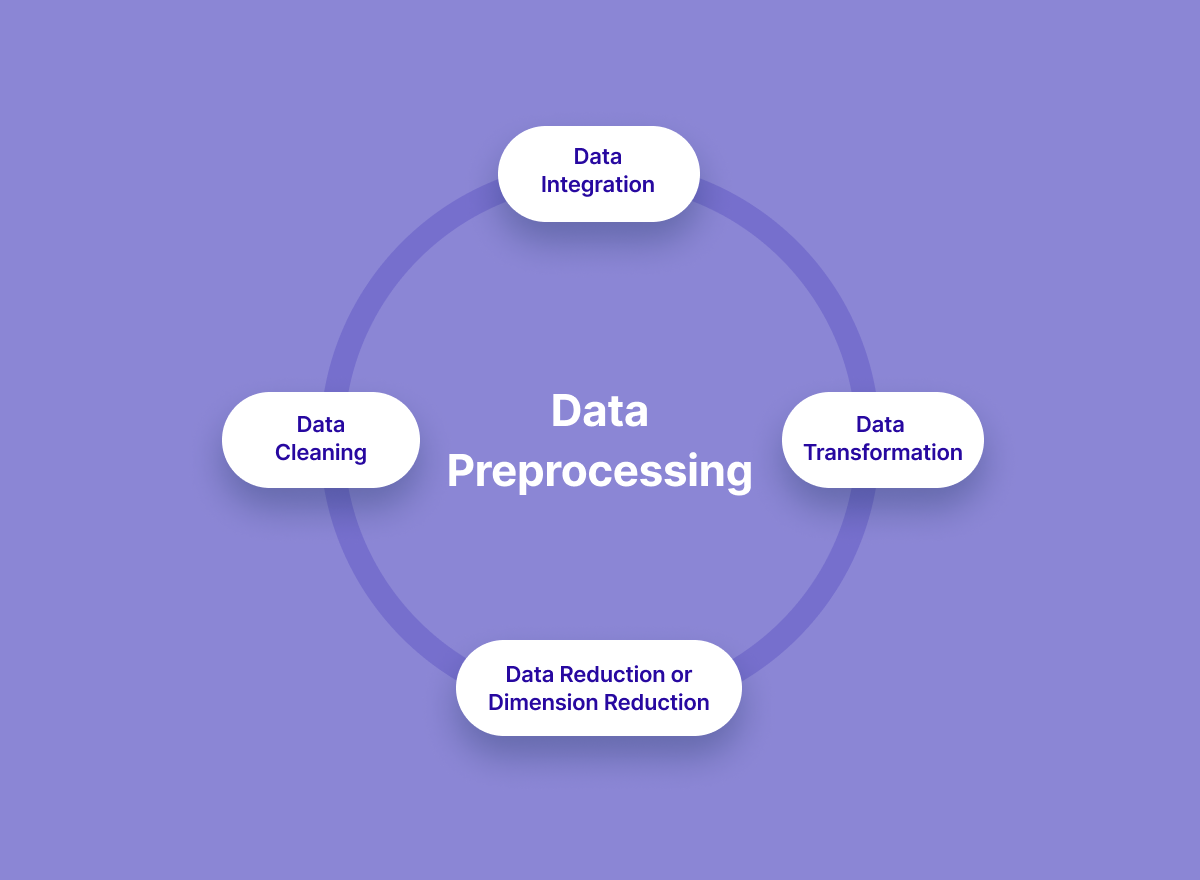


## Why is it Important ?
#### -> Data preprocessing is important for several reasons, and it plays a critical role in the success of data analysis, machine learning, and other data-driven tasks. Here are some key reasons why data preprocessing is essential:
#### -> 1) Quality of Analysis and Modeling:
#### Clean and well-organized data leads to more accurate and reliable analysis. Flawed or unprocessed data can introduce errors and distort results, potentially leading to incorrect conclusions.
#### -> 2) Improved Model Performance:
#### For machine learning models, the quality of the training data directly influences model performance. Preprocessing techniques such as handling missing values, normalizing features, and addressing outliers contribute to a model's ability to learn patterns and make accurate predictions.
#### -> 3) Handling Missing Data:
#### Many real-world datasets have missing values. Proper handling of missing data is crucial to prevent biased or incomplete analyses. Imputing missing values or removing instances with missing data can ensure that the analysis is based on complete information.
#### -> 4) Normalization and Standardization:
#### Standardizing or normalizing numerical features ensures that all features contribute equally to the model. This is important for algorithms that are sensitive to the scale of input features, such as gradient-based optimization algorithms used in machine learning and many more


### In the code below we found out the accuracy score using different methods and have also comapred them

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Loading the iris dataset

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Handling the missing values
# Missing values are added by us intentially

In [ ]:
df.iloc[2,1] = np.nan
df.iloc[4,0] = np.nan
df.iloc[3,3] = np.nan
df.iloc[0,2] = np.nan

In [ ]:
# Missing values are replaced with mean of the column

In [ ]:
df.fillna(df.mean(), inplace=True)


<ipython-input-15-bf934754a5b1>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
# Performing Log Transformation on the sepal length

In [ ]:
df['log_sepal_length'] = np.log(df['sepal_length'])


In [ ]:
# Finding the outliers

In [ ]:
# we are using Z-score method

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(df._get_numeric_data()))
df = df[(z_scores < 3).all(axis=1)]

In [ ]:
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species  \
0      5.100000     3.500000      3.773826      0.20000  setosa   
1      4.900000     3.000000      1.400000      0.20000  setosa   
2      4.700000     3.056376      1.300000      0.20000  setosa   
3      4.600000     3.100000      1.500000      1.20604  setosa   
4      5.848993     3.600000      1.400000      0.20000  setosa   

   log_sepal_length  
0          1.629241  
1          1.589235  
2          1.547563  
3          1.526056  
4          1.766270  


In [ ]:
# visualizaton

NameError: ignored

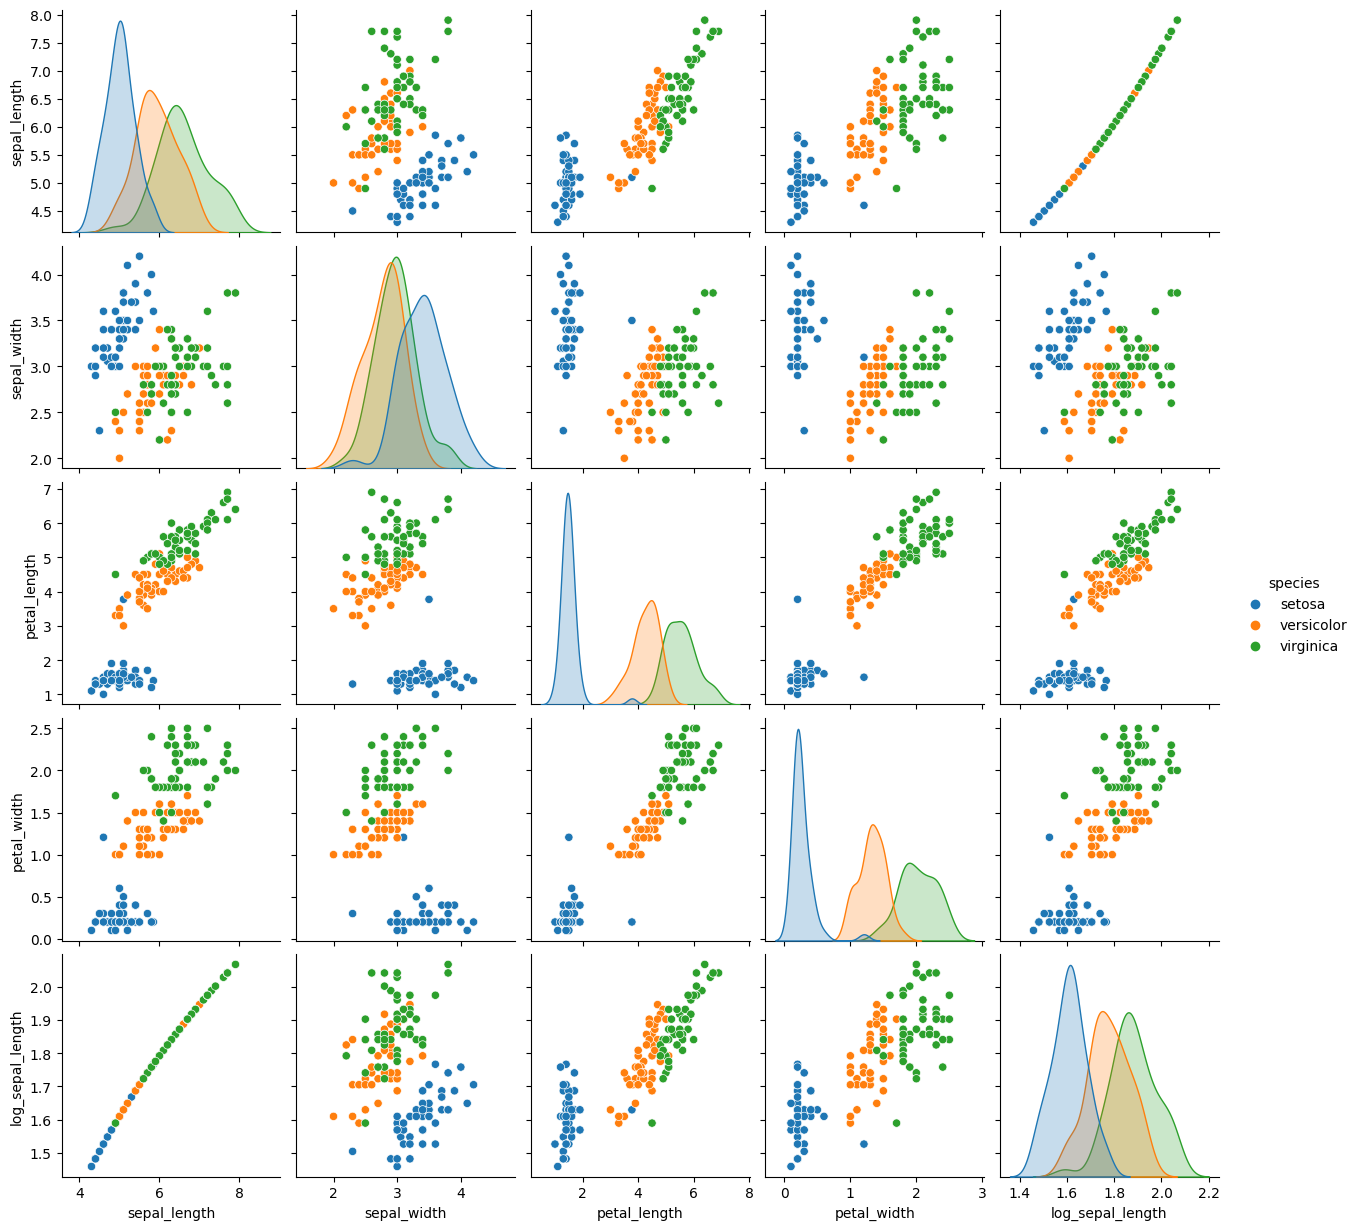

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
# Prepare for data modeling

In [ ]:
X = df.drop(['species', 'sepal_length'], axis=1)  # We drop the original 'sepal_length' column


In [ ]:
y = df['species']


In [ ]:
# Spliting the data into training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a K-Nearest Neighbors (KNN) classifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Make predictions on the test set

In [ ]:
y_pred = knn.predict(X_test)


In [ ]:
# Calculate the accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 90.00%


In [ ]:
# Decision Tree Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Decision Tree Classifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Prediction on the test data set

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calculating accuracy of the model

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 93.33%


In [ ]:
# Support Vector Machine (SVM)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


In [ ]:
# Training SVM

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
# Make prediction on test set
y_pred = svm.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test,y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 86.67%


In [ ]:
# Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train a Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Make predictions on the test set
y_pred = rf.predict(X_test)

In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

Model accuracy: 88.89%


In [ ]:
# Comaprison Table

In [ ]:
models = ['KNN', 'Decision Tree', 'SVM', 'Random Forest']

In [ ]:
accuracy_scores = [90.00, 93.33, 86.67, 88.89]
df = pd.DataFrame(list(zip(models, accuracy_scores)), columns=['Models', 'Accuracy Score'])
print(df)

          Models  Accuracy Score
0            KNN           90.00
1  Decision Tree           93.33
2            SVM           86.67
3  Random Forest           88.89


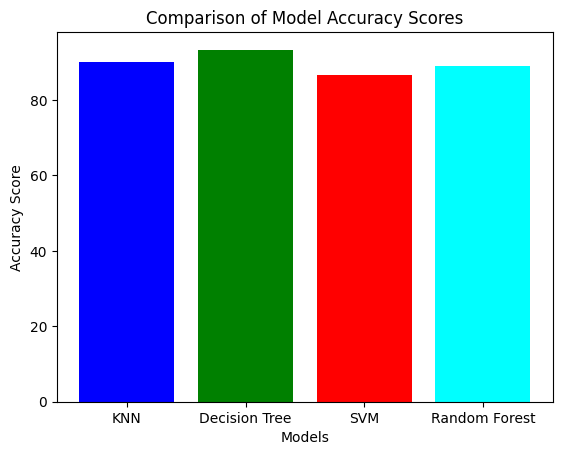

In [ ]:
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.show()